<a href="https://colab.research.google.com/github/leo-hoet/deep_learning_notebooks/blob/main/TP2_optimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [640]:
import seaborn as sns
import math
import pandas as pd
import random 
import numpy as np
from numpy import linalg as LA

In [641]:
def f(x):
  return -(x - 3) ** 2 + x+ 0.1 * math.sin(10 * x)


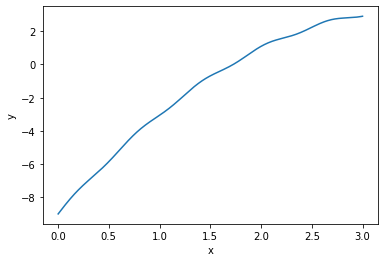

In [642]:
# generate dataset

points = []
for i in range(1000):
  x = (random.random()) * 3
  points.append({'x': x, 'y': f(x)})

df = pd.DataFrame(points)
sns.lineplot(data=df, x='x', y='y')

In [643]:
# hyper parameters
epochs = 100
batch_size = 20
n_batches = 8

In [644]:
# generate batches
batches = []
for i in range(n_batches):
  batches.append(df.x.sample(batch_size).to_numpy())

In [645]:
def predict_func(x, W):
  w1, w2, b = W
  return w1 * (x ** 2) + w2 * x + b

def calc_gradient(x, y, W) -> np.array:
  w1, w2, w3 = W
  f_partial_w1 = 2 * (y - w1 * (x ** 2) - w2 * x - w3) * (-x ** 2)
  f_partial_w2 = 2 * (y - w1 * (x ** 2) - w2 * x - w3) * -x
  f_partial_w3 = 2 * (y - w1 * (x ** 2) - w2 * x - w3) * (-1)

  return np.array([f_partial_w1, f_partial_w2, f_partial_w3])

def L_gradient(X, W):
  w1, w2, w3 = W
  L_partial_w1 = (1/batch_size) * (np.array([4 * (f(x) - w1 * (x ** 2) - w2 * x - w3) * (-w1 * x) for x in X]).sum())
  L_partial_w2 = (1/batch_size) * (np.array([4 * (f(x) - w1 * (x ** 2) - w2 * x - w3) * -w2 for x in X]).sum())
  L_partial_w3 = (1/batch_size) * (np.array([2 * (f(x) - w1 * (x ** 2) - w2 * x - w3) * (-1) for x in X]).sum())
  return np.array([L_partial_w1, L_partial_w2, L_partial_w3])

def mse(X,W):
  return np.array([(f(x) - predict_func(x, W)) ** 2 for x in X]).mean()

error_result = []

# Minibatch
learning_rate = 0.001
W = np.random.random(3) # w1, w2, and b
mse_minibatch = []
for e in range(epochs):
  for X in batches:
    x, *_ = X
    y_hat = predict_func(x, W)
    y = f(x)

    gradient = L_gradient( X, W)
    W = W - learning_rate * gradient
  error_result.append({'epoch':e, 'mse': mse(X,W), 'algol':'minibatch'})



In [646]:
# First orden momentun
learning_rate = 0.001
momentum = 0.01
W = np.random.random(3) # w1, w2, and b
mse_momentum = []
V = np.zeros(3)

for e in range(epochs):
  for X in batches:
    x, *_ = X
    y_hat = predict_func(x, W)
    y = f(x)
    err = y - y_hat

    gradient = L_gradient(X, W)
    V = momentum * V + learning_rate * gradient
    W = W - V
  mse_momentum.append(mse(X,W))
  error_result.append({'epoch':e, 'mse': mse(X,W), 'algol':'momentum'})

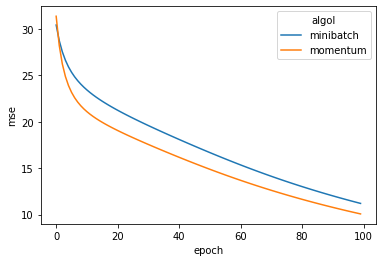

In [647]:
df = pd.DataFrame(error_result)
sns.lineplot(data=df, x='epoch', y='mse', hue='algol')

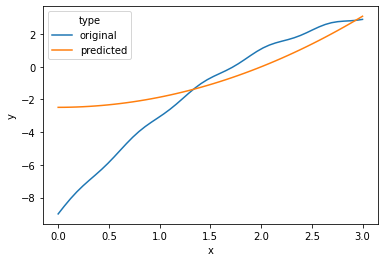

In [648]:
X = np.linspace(0,3,50)
y = np.array([predict_func(x,W) for x in X])
datas = []
for x in X:
  datas.append({'x':x, 'y':f(x), 'type':'original'})

for x in X:
  datas.append({'x':x, 'y':predict_func(x,W), 'type':'predicted'})

df = pd.DataFrame(datas)
sns.lineplot(data=df, x='x', y='y', hue='type')